# FSRQ Equavalent Width Calculation for loop

In [1]:
import os
import pandas as pd
import numpy as np
from astropy import units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import integrate
from astropy.cosmology import Planck13
from astropy.cosmology import WMAP9 as cosmo


Wavelength out of range, cannot calculate equavalent width


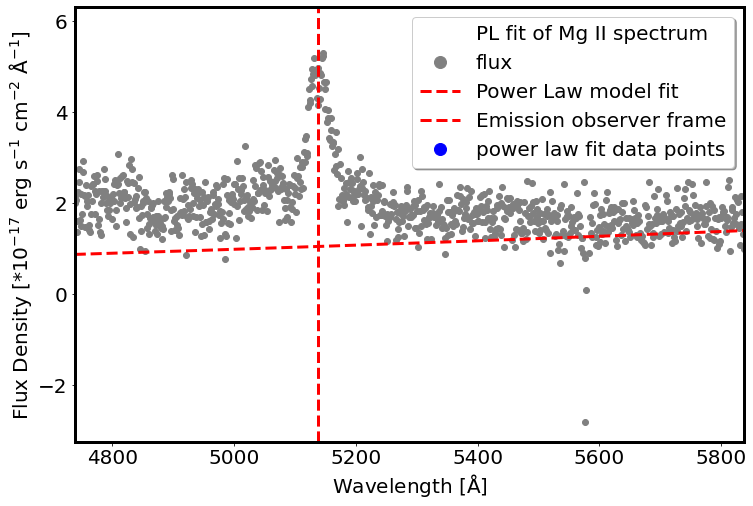

In [1813]:
#######################################################################################################
### BH mass estimation function
#######################################################################################################
def BHmass_calculation(source_name, emission_type, z, save_figure):
    
    path = f'/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/'+ name+'/'
    if not os.path.isdir(path):
        os.mkdir( path )
    
    if emission_type == 1:   ### H-alpha
        rest_lambda = 6562
        obs_lambda = rest_lambda*(1+z)
        Spec_type = 'H-alpha'
        
        def BH_mass(Luminosity, FWHM):
            M_BH_up = (1.3+0.3)*1E6*(Luminosity/1E42)**(0.57+0.06)*(FWHM/1E3)**(2.06+0.06)
            M_BH = (1.3)*1E6*(Luminosity/1E42)**(0.57)*(FWHM/1E3)**(2.06)
            M_BH_low = (1.3-0.3)*1E6*(Luminosity/1E42)**(0.57-0.06)*(FWHM/1E3)**(2.06-0.06)
            return M_BH_up, M_BH, M_BH_low
        
    elif emission_type == 2:   ### H-alpha
        rest_lambda = 4861
        obs_lambda = rest_lambda*(1+z)
        Spec_type = 'H-beta'
        
        def BH_mass(Luminosity, FWHM):
            M_BH_up = (2.4+0.3)*1E6*(Luminosity/1E42)**(0.59+0.06)*(FWHM/1E3)**(2)
            M_BH = (2.4)*1E6*(Luminosity/1E42)**(0.57)*(FWHM/1E3)**(2)
            M_BH_low = (2.4-0.3)*1E6*(Luminosity/1E42)**(0.59-0.06)*(FWHM/1E3)**(2)
            return M_BH_up, M_BH, M_BH_low
            
    elif emission_type == 3:   ### C IV
        rest_lambda = 1550
        obs_lambda = rest_lambda*(1+z)
        Spec_type = 'C IV'
        
        def BH_mass(Luminosity, FWHM):
            M_BH_up = 4.6E5*(Luminosity/1E42)**(0.60+0.16)*(FWHM/1E3)**(2)
            M_BH = 4.6E5*(Luminosity/1E42)**(0.60)*(FWHM/1E3)**(2)
            M_BH_low = 4.6E5*(Luminosity/1E42)**(0.60-0.16)*(FWHM/1E3)**(2)
            return M_BH_up, M_BH, M_BH_low
            
    elif emission_type == 4:   ### Mg II
        rest_lambda = 2800
        obs_lambda = rest_lambda*(1+z)
        Spec_type = 'Mg II'
        
        def BH_mass(Luminosity, FWHM):
            M_BH_up = 2.9E6*(Luminosity/1E42)**(0.57+0.02)*(FWHM/1E3)**(2)
            M_BH = 2.9E6*(Luminosity/1E42)**(0.57)*(FWHM/1E3)**(2)
            M_BH_low = 2.9E6*(Luminosity/1E42)**(0.57-0.02)*(FWHM/1E3)**(2)
            return M_BH_up, M_BH, M_BH_low
    
    if obs_lambda < min(wavelength):   # obs_lambda < min(wavelength)
        print('Spectrum wavelength less than the minimum observation wavelength, cannot calculate EW')
        params = [np.nan, np.nan, np.nan]
        EW = np.nan
        Luminosity = np.nan
        M_BH_up = np.nan 
        M_BH = np.nan
        M_BH_low = np.nan
        r_squ = np.nan
    elif obs_lambda > max(wavelength):   # obs_lambda < min(wavelength)
        print('Spectrum wavelength greater than the maximum observation wavelength, cannot calculate EW')
        params = [np.nan, np.nan, np.nan]
        EW = np.nan
        Luminosity = np.nan
        M_BH_up = np.nan 
        M_BH = np.nan
        M_BH_low = np.nan
        r_squ = np.nan
    else:
        try:
            #######################################################################################################
            ### define plotting regime
            #######################################################################################################
            obs_interval_low = obs_lambda-400
            obs_interval_up = obs_lambda+700
            index = np.where( (obs_interval_low < wavelength) & (wavelength < obs_interval_up))[0]

            plot_wavelength = wavelength[index]
            plot_flux = flux[index]

            #######################################################################################################
            ### find wavelength of peak flux 
            #######################################################################################################
            max_plot_flux_index = np.where( plot_flux == max(plot_flux) )[0]
            max_flux_wavelength = plot_wavelength[max_plot_flux_index]

            #######################################################################################################
            ### fit power law
            #######################################################################################################
            PL_lambda_low = max_flux_wavelength+400
            PL_lambda_up = max_flux_wavelength+600
            
            # PL_lambda_low = max(plot_wavelength)-400
            # PL_lambda_up = max(plot_wavelength)-200
            
            fit_PL_index = np.where( (PL_lambda_low < wavelength) & (wavelength < PL_lambda_up) )

            wavelength_powerlaw = wavelength[fit_PL_index]
            flux_powerlaw = flux[fit_PL_index]

            def func(y, a, C):
                return C+y*(a)

            popt, pcov = curve_fit(func, np.log10(wavelength_powerlaw), np.log10(flux_powerlaw))
            yfit_powerlaw = func(np.log10(plot_wavelength), *popt)

            #######################################################################################################
            ### plot power law fit
            #######################################################################################################
            plt.rcParams['figure.figsize'] = [12, 8]   # [15, 7.5]
            plt.rcParams['axes.linewidth'] = 3

            fig, ax = plt.subplots()

            ax.plot([], [], ' ', c = 'gray', markersize = 6, label = 'PL fit of ' + Spec_type + ' spectrum')
            ax.plot(plot_wavelength, plot_flux, 'o', c = 'gray', markersize = 6, label = 'flux')
            ax.plot(plot_wavelength, 10**yfit_powerlaw, '--', c = 'red', linewidth = 3, label = 'Power Law model fit')
            plt.axvline(x = obs_lambda, ymin = 0, ymax = 1, color = 'red', linestyle = 'dashed', linewidth = 3, label = 'Emission observer frame')
            ax.plot(wavelength_powerlaw, flux_powerlaw, 'o', c = 'blue', markersize = 6, label = 'power law fit data points')

            #ax.set_xlim (7700, 8800)

            ax.set_xlim(obs_interval_low, obs_interval_up)
            #ax.set_ylim (min(plot_flux)*0.8, max(plot_flux)*1.3)

            plt.xlabel( "Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
            plt.xticks(fontsize = 20)
            plt.ylabel('Flux Density [$\mathrm{*10^{-17} \ erg \ s^{-1} \ cm^{-2} \ \AA^{-1}}$]',  fontsize = 20)
            plt.yticks(fontsize = 20)
            #plt.grid(True)
            plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 

            if save_figure == 1:
                if emission_type == 1:
                    #plt.savefig('/Users/87steven/Downloads/H-alpha PL fit.pdf', bbox_inches = 'tight')
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/H-alpha PL fit.pdf', bbox_inches = 'tight')
                elif emission_type == 2:
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/H-beta PL fit.pdf', bbox_inches = 'tight')
                elif emission_type == 3:
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/C IV PL fit.pdf', bbox_inches = 'tight')
                elif emission_type == 4:
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/Mg II PL fit.pdf', bbox_inches = 'tight')

            #######################################################################################################
            ### Gaussian model fit
            #######################################################################################################
            def gauss(x, mean, sigma, A):
                Gauss_model = A*np.exp( -(x-mean)**2/2/sigma**2 )
                return Gauss_model

            ### gaussian integral for equivalent width
            def gaussian_integral(x, mu, sigma, A): 
                EW = A*np.exp( -(x-mu)**2/2/sigma**2 )
                return EW

            fit_index = np.where( (max_flux_wavelength-200 < plot_wavelength) & (plot_wavelength < max_flux_wavelength+200) )
            wavelength_fit = plot_wavelength[fit_index]
            flux_fit = (plot_flux-10**yfit_powerlaw)[fit_index]

            expected = (max(wavelength_fit), 50, 100)
            params, cov = curve_fit(gauss, wavelength_fit, flux_fit, expected)
            sigma = np.sqrt( np.diag(cov) )

            x_fit = np.linspace(min(wavelength_fit), max(wavelength_fit), len(wavelength_fit))
            y_fit = gauss(x_fit, *params)

            EW = integrate.simpson(gaussian_integral(x_fit, params[0], params[1], params[2]), x_fit)

            ### r^2 test (goodness of the fit)
            ss_res = np.sum((flux_fit - y_fit) ** 2)
            ss_tot = np.sum(flux_fit - np.mean(flux_fit) ** 2)
            # r-square calculation
            r_squ = 1 - (ss_res / ss_tot)

            print('Gaussain Model fit result: Mean = %4.2f, Sigma = %4.2f, Amplitude = %4.2f' %(params[0], params[1], params[2]))
            print('EW = %4.2f [erg s^-1 cm^-2]' %(EW))
            print('Goodness of the fit (r_square) = %4.2f' %(r_squ))

            #######################################################################################################
            ### plot Gaussian model fit
            #######################################################################################################
            plt.rcParams['figure.figsize'] = [12, 8]   # [15, 7.5]
            plt.rcParams['axes.linewidth'] = 3

            fig, ax = plt.subplots()
            
            ax.plot([], [], ' ', c = 'gray', markersize = 6, label = 'Gaussain Fit of ' + Spec_type)
            ax.plot(plot_wavelength, plot_flux-10**yfit_powerlaw, 'o', c = 'gray', markersize = 6, label = 'Power law subtracted flux')
            ax.plot(x_fit, y_fit, '--', c = 'blue', linewidth = 3, label = 'Gaussian model fit')
            #plt.axvline(x = obs_lambda, ymin = 0, ymax = 1, color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Emission observer frame')

            #ax.set_xlim (7700, 8800)

            ax.set_xlim (obs_interval_low, obs_interval_up)
            #ax.set_ylim (min(plot_flux-10**yfit_powerlaw)*0.8, max(plot_flux-10**yfit_powerlaw)*1.2)

            plt.xlabel("Wavelength [$\mathrm{\AA}$]",  fontsize = 20)
            plt.xticks(fontsize = 20)
            plt.ylabel('Flux Density [$\mathrm{*10^{-17} \ erg \ s^{-1} \ cm^{-2} \ \AA^{-1}}$]',  fontsize = 20)
            plt.yticks(fontsize = 20)
            #plt.grid(True)
            plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1., 1), fontsize = 20, markerscale = 2) 

            if save_figure == 1:
                if emission_type == 1:
                    #plt.savefig('/Users/87steven/Downloads/H-alpha EW fit.pdf', bbox_inches = 'tight')
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/H-alpha EW fit.pdf', bbox_inches = 'tight')
                elif emission_type == 2:
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/H-beta EW fit.pdf', bbox_inches = 'tight')
                elif emission_type == 3:
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/C IV EW fit.pdf', bbox_inches = 'tight')
                elif emission_type == 4:
                    plt.savefig('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/SDSS EW figure/' + name + '/Mg II EW fit.pdf', bbox_inches = 'tight')

            ### luminosity calculation
            lumi_dis_Mpc = cosmo.luminosity_distance(z).value   # [Mpc]
            lumi_dis_cm = lumi_dis_Mpc*1.0E6*3.08E18   # [cm]

            Luminosity = EW*1E-17*4*np.pi*lumi_dis_cm**2

            if emission_type == 1:
                print('H-alpha Luminosity = %4.2e [erg s^-1]' %(Luminosity))
            elif emission_type == 2:
                print('H-beta Luminosity = %4.2e [erg s^-1]' %(Luminosity))
            elif emission_type == 3: 
                print('C IV Luminosity = %4.2e [erg s^-1]' %(Luminosity))
            elif emission_type == 4:
                print('Mg II Luminosity = %4.2e [erg s^-1]' %(Luminosity))

            M_BH_up, M_BH, M_BH_low = BH_mass(Luminosity, params[0])
            print('BH mass upper limit = %4.2e M_solar, BH mass = %4.2e M_solar, BH mass lower limit = %4.2e M_solar' %(M_BH_up, M_BH, M_BH_low))
        except:
            params = [np.nan, np.nan, np.nan]
            EW = np.nan
            Luminosity = np.nan
            M_BH_up = np.nan 
            M_BH = np.nan
            M_BH_low = np.nan
            r_squ = np.nan
            print('Wavelength out of range, cannot calculate equavalent width')
                    
    return params, r_squ, EW, Luminosity, M_BH_up, M_BH, M_BH_low
    
#######################################################################################################
### test source
#######################################################################################################

### J1220+0203
### for testing H-alpha, and H-beta
# Table = pd.read_csv('/Users/87steven/Downloads/J1220+0203 SDSS spectrum.csv')
# name = 'J1220+0203'
# z = 0.24

### J0121+1149
### for testing Mg II
# Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/J0121+1149.csv')
# name = 'J0121+1149'
# z = 0.57

### J0856+2111
### for testing C IV and Mg II
# Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/J0856+2111.csv')
# name = 'J0856+2111'
# z = 2.098

### J0006+2422
### for testing Mg II
# Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/J0006+2422.csv')
# name = 'J0006+2422'
# z = 1.684

### J0007-6113 (exceed maximum observation wavelength => emission_type = 2)
# Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/J0007-6113.csv')
# name = 'J0007-6113'
# z = 0.857

### J0026-1112 (exceed minimum observation wavelength => emission_type = 3)
# Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/J0026-1112.csv')
# name = 'J0026-1112'
# z = 1.118

### J0029+0554 (exceed minimum observation wavelength => emission_type = 3)
# Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/J0029+0554.csv')
# name = 'J0029+0554'
# z = 1.314

### J2238+2749
Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/J2238+2749.csv')
name = 'J2238+2749'
z = 0.835


#######################################################################################################
wavelength = Table['Wavelength'].values
flux = Table['Flux'].values
bestfit = Table['BestFit'].values
skyflux = Table['SkyFlux'].values

### 1 = h-alpha
### 2 = h-beta
### 3 = C IV
### 4 = Mg
emission_type = 4
save_figure = 0
params, r_squ, EW, Luminosity, M_BH_up, M_BH, M_BH_low = BHmass_calculation(name, emission_type, z, save_figure)


In [ ]:
### for loop algorism

def ClearData():
    data = {
    'spectrum name': [],
    'params_0': [],
    'params_1': [],
    'params_2': [],
    'r_square': [],
    'EW': [],
    'Luminosity': [],
    'M_BH_up': [],
    'M_BH': [],
    'M_BH_low': []
      }
    return data

# table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum download log.csv')

# source_name = table['source_name'].values
# download_status = table['spectrum_Donload_status'].values
# source_z = table['z'].values

# index = np.where( download_status == 'Complete')[0]

# source_name = source_name[index]
# source_z = source_z[index]

path = "/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum"
dir_list = os.listdir(path) 

dir_list = set(dir_list)
dir_list.remove('.DS_Store')
dir_list = sorted(dir_list)

table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/data/BZCAT_Xmatch_ACC_list.csv')

table_name = table.name.values
table_z = table.z.values

for i in range(0, 1):   # len(dir_list)
    df = ClearData()
    
    ### for test only
    # save_figure = 0
    # source_name = 'J0856+2111'
    # z = 2.098
    
    ### for loop parameters
    name = dir_list[i][0:10]
    index = np.where(table_name == name)[0]
    z = table_z[ index[0] ]
    save_figure = 1
    
    print('i = ', i, ', source name = ', name)
    #######################################################################################################
    Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS spectrum/' + name + '.csv')
    wavelength = Table['Wavelength'].values
    flux = Table['Flux'].values
    bestfit = Table['BestFit'].values
    skyflux = Table['SkyFlux'].values

    for k in range(1, 5):
                
        if k == 1:
            print("========== h-alpha ==========")
            df['spectrum name'].append('H-alpha')
        elif k == 2:
            print("========== h-beta ==========")
            df['spectrum name'].append('H-beta')
        elif k == 3: 
            print("========== C IV ==========")
            df['spectrum name'].append('C IV')
        elif k == 4:
            print("========== Mg II ==========")
            df['spectrum name'].append('Mg II')
            
        emission_type = k
        try:
            params, r_squ, EW, Luminosity, M_BH_up, M_BH, M_BH_low = BHmass_calculation(name, emission_type, z, save_figure)

            params_0 = params[0]
            params_1 = params[1]
            params_2 = params[2]

#             print('Gaussain Model fit result: Mean = %4.2f, Sigma = %4.2f, Amplitude = %4.2f' %(params[0], params[1], params[2]))
#             print('EW = %4.2f [erg s^-1 cm^-2]' %(EW))
#             print('Goodness of the fit (r_square) = %4.2f' %(r_squ))
            
#             print('BH mass upper limit = %4.2e M_solar, BH mass = %4.2e M_solar, BH mass lower limit = %4.2e M_solar' %(M_BH_up, M_BH, M_BH_low))

        except: 
            params_0 = np.nan
            params_1 = np.nan
            params_2 = np.nan
            EW = np.nan
            Luminosity = np.nan
            M_BH_up = np.nan
            M_BH = np.nan
            M_BH_low = np.nan
            print(' NO fit performed ')
        
        df['params_0'].append( params_0 )
        df['params_1'].append( params_1 )
        df['params_2'].append( params_2 )
        df['r_square'].append( r_squ )
        df['EW'].append( EW )
        df['Luminosity'].append( Luminosity )
        df['M_BH_up'].append( M_BH_up )
        df['M_BH'].append( M_BH )
        df['M_BH_low'].append( M_BH_low )

    CSVfile = f'/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/{name} SDSS EW result.csv'   
    dff = pd.DataFrame(df)      
    dff.to_csv(CSVfile, index = False)
    
    print('=================================== File download succfully ===================================')
